ID:20-43679-2

A CNN model using tensorflow sequential API to classify CIFAR-10 dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
import numpy as np
import matplotlib.pyplot as plt

Load the CIFAR-10 dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


Normalize pixel values to be in the range [0, 1]

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Task 1: Applying different optimizers

In [4]:
def build_basic_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [11]:
def train_model_with_optimizer(optimizer, learning_rate=0.001):
    model = build_basic_cnn_model()
    model.compile(optimizer=optimizer(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, batch_size=32,
                        validation_data=(test_images, test_labels), verbose=2)

    return history, model

Training with different optimizers

In [23]:
sgd_history, sgd_model = train_model_with_optimizer(SGD, learning_rate=0.01)
adam_history, adam_model = train_model_with_optimizer(Adam, learning_rate=0.001)
rmsprop_history, rmsprop_model = train_model_with_optimizer(RMSprop, learning_rate=0.001)

Epoch 1/10
1563/1563 - 75s - loss: 2.0635 - accuracy: 0.2470 - val_loss: 1.9368 - val_accuracy: 0.2978 - 75s/epoch - 48ms/step
Epoch 2/10
1563/1563 - 73s - loss: 1.6718 - accuracy: 0.3970 - val_loss: 1.5582 - val_accuracy: 0.4316 - 73s/epoch - 46ms/step
Epoch 3/10
1563/1563 - 74s - loss: 1.4717 - accuracy: 0.4709 - val_loss: 1.3968 - val_accuracy: 0.4970 - 74s/epoch - 47ms/step
Epoch 4/10
1563/1563 - 74s - loss: 1.3530 - accuracy: 0.5168 - val_loss: 1.3931 - val_accuracy: 0.5024 - 74s/epoch - 47ms/step
Epoch 5/10
1563/1563 - 73s - loss: 1.2690 - accuracy: 0.5518 - val_loss: 1.2815 - val_accuracy: 0.5405 - 73s/epoch - 46ms/step
Epoch 6/10
1563/1563 - 75s - loss: 1.1948 - accuracy: 0.5798 - val_loss: 1.2383 - val_accuracy: 0.5603 - 75s/epoch - 48ms/step
Epoch 7/10
1563/1563 - 75s - loss: 1.1323 - accuracy: 0.5992 - val_loss: 1.1436 - val_accuracy: 0.5991 - 75s/epoch - 48ms/step
Epoch 8/10
1563/1563 - 74s - loss: 1.0775 - accuracy: 0.6216 - val_loss: 1.1015 - val_accuracy: 0.6108 - 74s/ep

Effect of using regularizers (L1/L2) in Conv2D layer

In [15]:
def build_cnn_with_l2_regularization():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [8]:
def train_model_with_l2_regularization(optimizer='adam'):
    model = build_cnn_with_l2_regularization()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, batch_size=32,
                        validation_data=(test_images, test_labels), verbose=2)

    return history, model

Training with L2 regularization

In [9]:
l2_history, l2_model = train_model_with_l2_regularization()

Epoch 1/10
1563/1563 - 76s - loss: 1.6224 - accuracy: 0.4298 - val_loss: 1.3226 - val_accuracy: 0.5530 - 76s/epoch - 49ms/step
Epoch 2/10
1563/1563 - 76s - loss: 1.2778 - accuracy: 0.5741 - val_loss: 1.2470 - val_accuracy: 0.5832 - 76s/epoch - 48ms/step
Epoch 3/10
1563/1563 - 82s - loss: 1.1363 - accuracy: 0.6312 - val_loss: 1.0961 - val_accuracy: 0.6416 - 82s/epoch - 52ms/step
Epoch 4/10
1563/1563 - 75s - loss: 1.0508 - accuracy: 0.6626 - val_loss: 1.0512 - val_accuracy: 0.6683 - 75s/epoch - 48ms/step
Epoch 5/10
1563/1563 - 78s - loss: 0.9973 - accuracy: 0.6860 - val_loss: 1.0293 - val_accuracy: 0.6810 - 78s/epoch - 50ms/step
Epoch 6/10
1563/1563 - 74s - loss: 0.9515 - accuracy: 0.7035 - val_loss: 1.0010 - val_accuracy: 0.6920 - 74s/epoch - 47ms/step
Epoch 7/10
1563/1563 - 75s - loss: 0.9217 - accuracy: 0.7156 - val_loss: 1.0475 - val_accuracy: 0.6753 - 75s/epoch - 48ms/step
Epoch 8/10
1563/1563 - 75s - loss: 0.8877 - accuracy: 0.7311 - val_loss: 0.9958 - val_accuracy: 0.6985 - 75s/ep

Task 3: Comparison of using data preprocessing vs no preprocessing

In [16]:
def build_cnn_model_without_preprocessing(optimizer='adam'):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [17]:
def train_model_without_preprocessing(optimizer='adam'):
    model = build_cnn_model_without_preprocessing()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, batch_size=32,
                        validation_data=(test_images, test_labels), verbose=2)

    return history, model

Training without data preprocessing

In [18]:
no_preprocess_history, no_preprocess_model = train_model_without_preprocessing()

Epoch 1/10
1563/1563 - 77s - loss: 1.5198 - accuracy: 0.4466 - val_loss: 1.3337 - val_accuracy: 0.5224 - 77s/epoch - 49ms/step
Epoch 2/10
1563/1563 - 76s - loss: 1.1663 - accuracy: 0.5864 - val_loss: 1.0917 - val_accuracy: 0.6113 - 76s/epoch - 48ms/step
Epoch 3/10
1563/1563 - 74s - loss: 1.0029 - accuracy: 0.6481 - val_loss: 0.9802 - val_accuracy: 0.6554 - 74s/epoch - 47ms/step
Epoch 4/10
1563/1563 - 74s - loss: 0.9047 - accuracy: 0.6825 - val_loss: 0.9223 - val_accuracy: 0.6795 - 74s/epoch - 47ms/step
Epoch 5/10
1563/1563 - 73s - loss: 0.8354 - accuracy: 0.7079 - val_loss: 0.9506 - val_accuracy: 0.6754 - 73s/epoch - 46ms/step
Epoch 6/10
1563/1563 - 75s - loss: 0.7807 - accuracy: 0.7270 - val_loss: 0.8908 - val_accuracy: 0.6945 - 75s/epoch - 48ms/step
Epoch 7/10
1563/1563 - 74s - loss: 0.7360 - accuracy: 0.7436 - val_loss: 0.8426 - val_accuracy: 0.7100 - 74s/epoch - 47ms/step
Epoch 8/10
1563/1563 - 74s - loss: 0.6895 - accuracy: 0.7598 - val_loss: 0.8614 - val_accuracy: 0.7033 - 74s/ep

Plotting the results

Task 1: Plotting the accuracy and loss for each optimizer

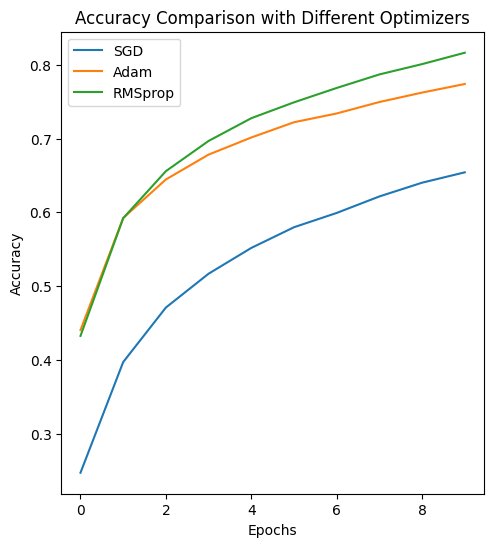

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sgd_history.history['accuracy'], label='SGD')
plt.plot(adam_history.history['accuracy'], label='Adam')
plt.plot(rmsprop_history.history['accuracy'], label='RMSprop')
plt.title('Accuracy Comparison with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

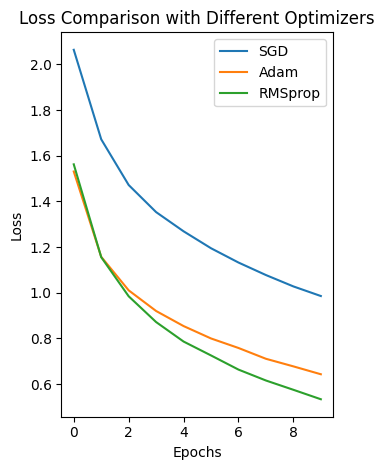

In [25]:
plt.subplot(1, 2, 2)
plt.plot(sgd_history.history['loss'], label='SGD')
plt.plot(adam_history.history['loss'], label='Adam')
plt.plot(rmsprop_history.history['loss'], label='RMSprop')
plt.title('Loss Comparison with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Task 2: Plotting the accuracy and loss for L2 regularization

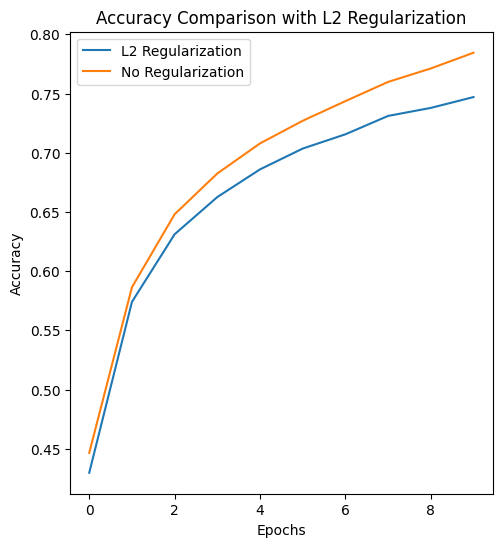

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(l2_history.history['accuracy'], label='L2 Regularization')
plt.plot(no_preprocess_history.history['accuracy'], label='No Regularization')
plt.title('Accuracy Comparison with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

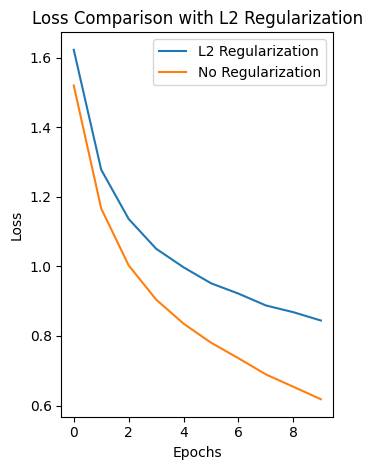

In [22]:
plt.subplot(1, 2, 2)
plt.plot(l2_history.history['loss'], label='L2 Regularization')
plt.plot(no_preprocess_history.history['loss'], label='No Regularization')
plt.title('Loss Comparison with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()